In [48]:
import pandas as pd 
import numpy as np
import networkx as nx
from os import listdir
from os.path import isfile, join
# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_files(path,sufix):
    """ Returns list of files on specified path with specified sufix
    """
    mypath = path
    return [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(sufix)]

In [3]:
def is_unidirectional(graph, node1, node2):
    if graph.has_edge(node1, node2) == graph.has_edge(node2, node1):
        return False
    return True

In [4]:
def count_unidirectional_pairs(d_graph):
    edges = d_graph.edges()
    count = 0
    for edge_pair in edges:
        if is_unidirectional(d_graph, edge_pair[0], edge_pair[1]) == True:
            count += 1 
    return count

In [5]:
def fraction_unidirected_pairs(d_graph):
    return round(count_unidirectional_pairs(d_graph)/len(d_graph.edges()),2)

# Fraction of unidirectional links in the network over time (General)

In [6]:
files = get_files("../data/graphs/", "12_dir")

In [7]:
lst = []
for file in files: 
    d_graph = nx.read_gpickle(join("../data/graphs", file))
    lst.append(fraction_unidirected_pairs(d_graph))

In [8]:
# g = sns.pointplot(files, lst)

In [9]:
def plot_overall(image_name="overall.png", range_yaxis = [0.5,1]):
    x_label = [f.replace("_12_dir", "") for f in files]
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot(x_label, lst, marker="o")
    plt.xticks(x_label, rotation=50, fontsize=13, weight="bold")
    plt.xlabel("Year", fontsize=15, weight="bold")
    plt.yticks(fontsize=13, weight="bold")
    plt.ylabel("Unidirectional links in the Network", fontsize=15, weight="bold")
    ax.set_ylim(range_yaxis)
    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')
    plt.show()

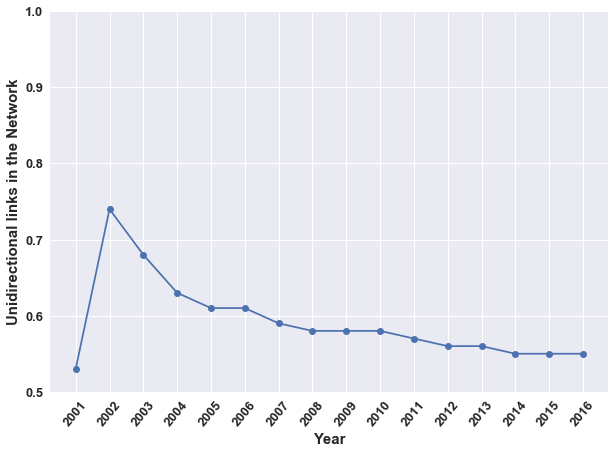

In [10]:
plot_overall()

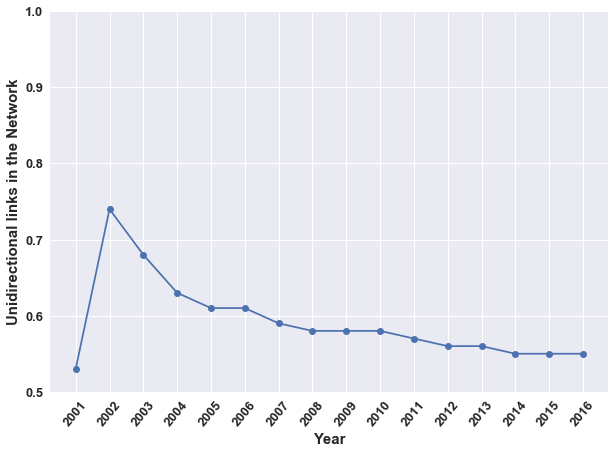

In [11]:
plot_overall(image_name="overall_zoom.png",range_yaxis=[0.5,1])

# Fraction of unidirectional links (Male to Female and Female to Male) in the network over time (General)

In [12]:
# d_graph = nx.read_gpickle(join("../data/graphs", files[15]))

In [13]:
def filter_for_gender(d_graph, gender_from, gender_to):
    edges = d_graph.edges()
#     print(len(edges))
    for edge_pair in edges:
        if d_graph.node[edge_pair[0]]["gender"] != gender_from or d_graph.node[edge_pair[1]]["gender"] != gender_to:
            edges.remove(edge_pair)
#     print(len(edges))
    return edges

In [14]:
def fraction_unidirected_pairs_gender(graph, gender_from, gender_to):
    edges = filter_for_gender(graph, gender_from, gender_to)
    dg = nx.DiGraph(edges)
    return count_unidirectional_pairs(dg)/count_unidirectional_pairs(graph)

In [15]:
def gender_fractions_over_time(files, gender_from, gender_to):
    lst = []
    for file in files: 
        d_graph = nx.read_gpickle(join("../data/graphs", file))
        lst.append(fraction_unidirected_pairs_gender(d_graph, gender_from, gender_to))
    return lst

In [16]:
def plot_male_to_female(image_name="male_female.png", range_yaxis = [0.5,1]):
    x_label = [f.replace("_12_dir", "") for f in files]
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot(x_label, m_f_lst, marker="o", label="male to female")
    plt.plot(x_label, f_m_lst, marker="*", label="female to male")
    plt.xticks(x_label, rotation=50, fontsize=13, weight="bold")
    plt.xlabel("Year", fontsize=15, weight="bold")
    plt.yticks(fontsize=13, weight="bold")
    plt.ylabel("Unidirectional links in the Network", fontsize=15, weight="bold")
    ax.set_ylim(range_yaxis)
    plt.legend(loc='lower right', fontsize=20)
    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')
    plt.show()

In [17]:
# fraction_unidirected_pairs_gender(d_graph, "male", "female")

In [18]:
# fraction_unidirected_pairs_gender(d_graph, "female", "male")

In [19]:
m_f_lst = gender_fractions_over_time(files, "male", "female")

In [20]:
f_m_lst = gender_fractions_over_time(files, "female", "male")

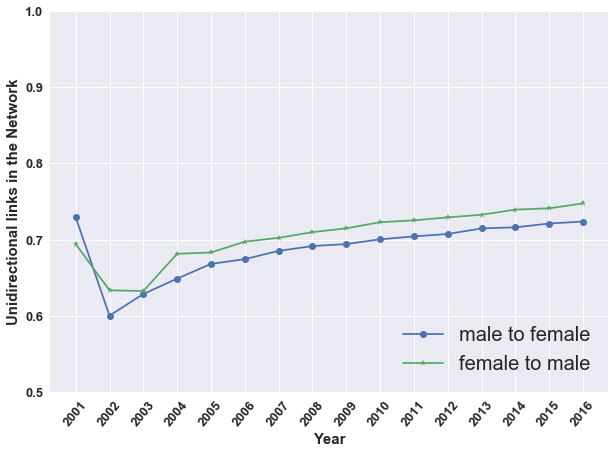

In [21]:
plot_male_to_female()

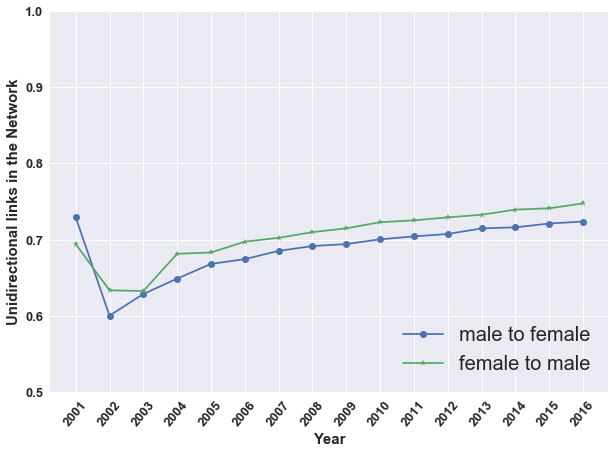

In [22]:
plot_male_to_female(image_name="male_female_zoom.png",range_yaxis=[0.5,1])

# Combined plot 

In [23]:
def combined_plot(image_name="double_plot.png", range_yaxis=[0.5,1]):
    x_label = [f.replace("_12_dir", "") for f in files]
    fig, ax = plt.subplots(figsize=(12, 12),nrows=2, ncols=1)
    ax,ax2 = ax
    # x_label = [f.replace("_12_dir", "") for f in files]
    ax.plot(x_label, lst, marker="o")
    ax.set_ylim(range_yaxis)
    # ax.set_xlabel("Year", fontsize=13, weight="bold")
    ax.set_xticklabels(x_label, rotation=50, fontsize=14, weight="bold")
    # ax.set_ylabel("Unidirectional links in the Network","o", fontsize=16, weight="bold")
    ax.set_ylabel("Unidirectional links in the network", fontsize=16, weight="bold")
    ax.set_yticklabels([round(i,2) for i in list(np.arange(range_yaxis[0],range_yaxis[1]+0.05,0.1))],
                       fontsize=13, weight="bold")

    ax2.plot(x_label, m_f_lst, marker="o", label="male to female")
    ax2.plot(x_label, f_m_lst, marker="*", label="female to male")
    ax2.set_ylim(range_yaxis)
    # ax.set_xlabel("Year", fontsize=13, weight="bold")
    ax2.set_xticklabels(x_label, rotation=50, fontsize=14, weight="bold")
    ax2.set_ylabel("Unidirectional links between the genders", fontsize=16, weight="bold")
    ax2.set_xlabel("Year", fontsize=16, weight="bold")
    ax2.legend(loc='lower right', fontsize=22)
    ax2.set_yticklabels([round(i,2) for i in list(np.arange(range_yaxis[0],range_yaxis[1]+0.05,0.1))],
                        fontsize=13, weight="bold")
    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')
    plt.show()

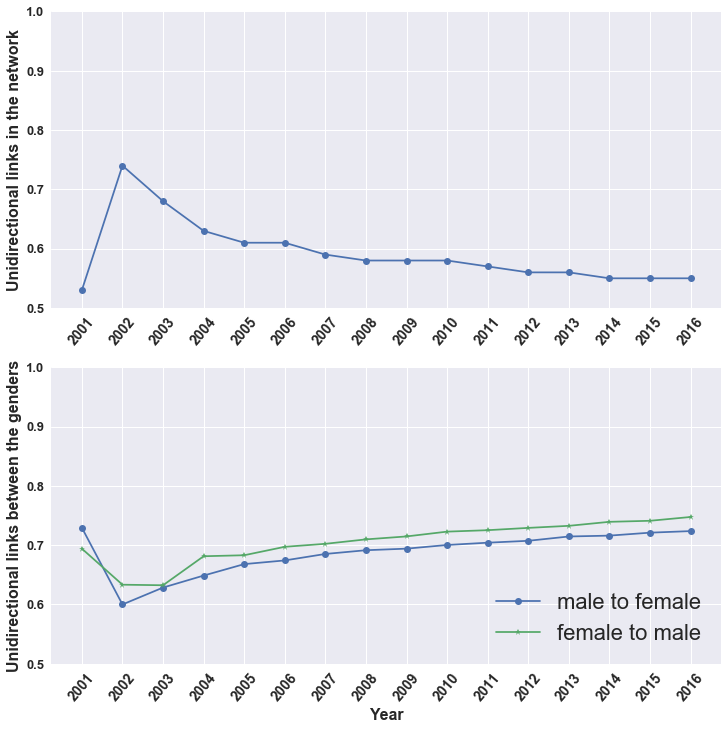

In [24]:
combined_plot()

In [162]:
def plot_with_inlay(image_name="combined_with_inlay.png", range_yaxis=[0.55,0.75], range_yaxis_main=[0.53,0.75]):    
    fig,ax = plt.subplots(figsize=(18,12), facecolor='white')

    
    plt.plot(x_label, lst, marker="o")
    # plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
    ax.set_ylim(range_yaxis_main)
    ax.set_xlabel("Year", fontsize=22, weight="bold")
    ax.set_xticklabels(x_label, rotation=50, fontsize=22, weight="bold")
    # ax.set_ylabel("Unidirectional links in the Network","o", fontsize=16, weight="bold")
    ax.set_ylabel("Unidirectional links in the network", fontsize=22, weight="bold")
    ax.set_yticklabels([round(i,2) for i in list(np.arange(range_yaxis[0],range_yaxis_main[1]+0.05,0.025))],
                        fontsize=18, weight="bold")
    ax.set_facecolor("white")
    left, bottom, width, height = .48, .45, .4, .35
    dim = [left, bottom,width, height]
    a = plt.axes(dim)
   

    plt.plot(x_label, m_f_lst, marker="o", label="male to female")
    plt.plot(x_label, f_m_lst, marker="*", label="female to male")
    # ax.set_xlabel("Year", fontsize=13, weight="bold")
    a.set_xticklabels(x_label, rotation=50, fontsize=18, weight="bold")
    a.set_ylabel("Unidirectional links between the genders", fontsize=20, weight="bold")
    a.set_xlabel("Year", fontsize=16, weight="bold")
    a.legend(loc='lower right', fontsize=26)
    a.set_ylim(range_yaxis)
    a.set_yticklabels([round(i,2) for i in list(np.arange(range_yaxis[0],range_yaxis[1]+0.05,0.025))],
                        fontsize=18, weight="bold")
    a.set_facecolor("white")
    
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')

    plt.show()

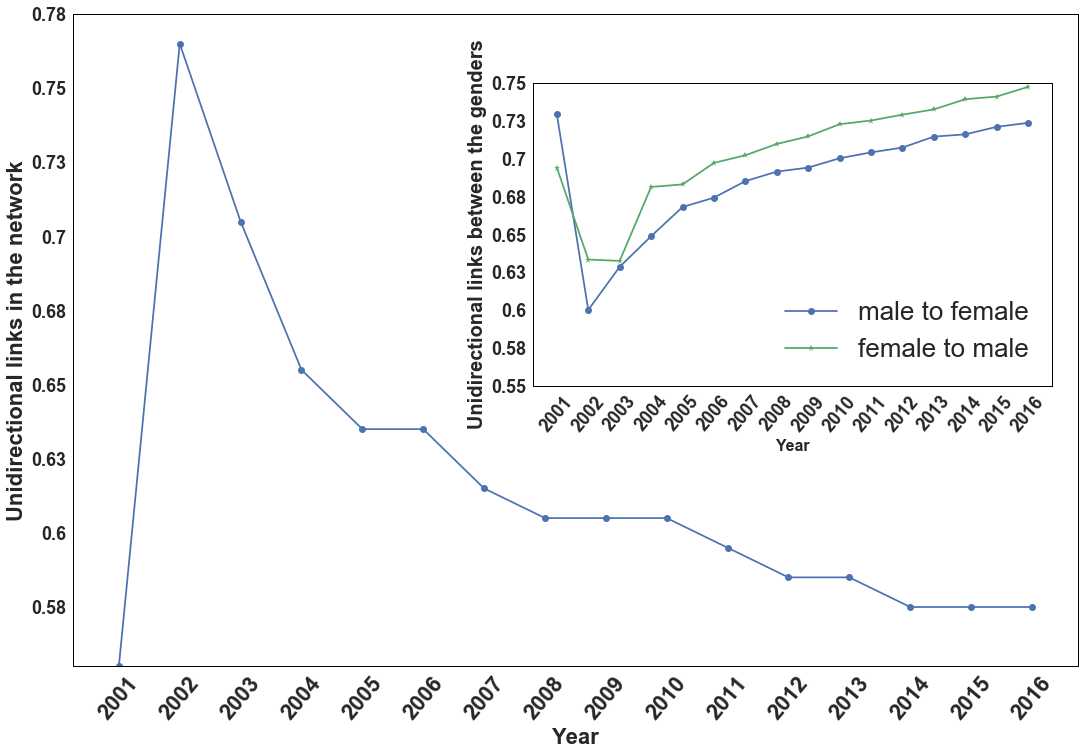

In [163]:
plot_with_inlay()